In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./data/seoul_weather.csv', encoding='cp949', skiprows=11)
df.head(2)

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각
0,108,서울,1907-10-01,13.5,20.7,NaN,7.9,NaN
1,108,서울,1907-10-02,16.2,22.0,NaN,7.9,NaN


In [6]:
df.columns

Index(['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '\t최고기온시각', '최저기온(℃)',
       '최저기온시각'],
      dtype='object')

In [ ]:
df = df.drop(['\t\t지점번호', '지점명', '\t최고기온시각', '최저기온시각'], axis=1)

In [8]:
df.head(2)

,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,1907-10-01,13.5,20.7,7.9
1,1907-10-02,16.2,22.0,7.9


In [12]:
df.columns = ['일시','평온','고온','저온']
df.head()

,일시,평온,고온,저온
0,1907-10-01,13.5,20.7,7.9
1,1907-10-02,16.2,22.0,7.9
2,1907-10-03,16.2,21.3,13.1
3,1907-10-04,16.5,22.0,11.2
4,1907-10-05,17.6,25.4,10.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40488 entries, 0 to 40487
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      40488 non-null  object 
 1   평온      39732 non-null  float64
 2   고온      39730 non-null  float64
 3   저온      39731 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.2+ MB


In [15]:
df['일시'] = pd.to_datetime(df['일시'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40488 entries, 0 to 40487
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      40488 non-null  datetime64[ns]
 1   평온      39732 non-null  float64       
 2   고온      39730 non-null  float64       
 3   저온      39731 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.2 MB


In [21]:
df['일시'].dt.dayofweek

0        1
1        2
2        3
3        4
4        5
        ..
40483    0
40484    1
40485    2
40486    3
40487    4
Name: 일시, Length: 40488, dtype: int64

In [22]:
# 8월의 최고기온을 추출해서 라인그래프로 그리시오..

<AxesSubplot:>

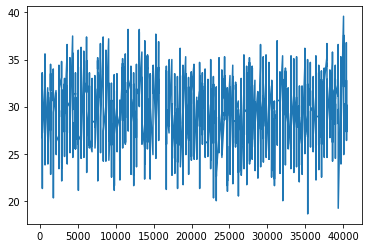

In [31]:
df.loc[df['일시'].dt.month == 8]['고온'].plot()

<AxesSubplot:ylabel='Frequency'>

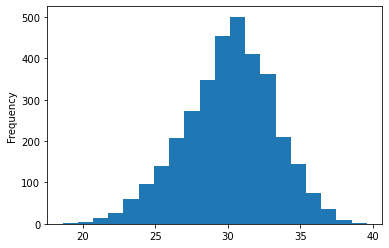

In [33]:
df.loc[df['일시'].dt.month == 8]['고온'].plot(kind='hist', bins=20)

In [35]:
# 매년 8월 중의 최고기온 하나를 line chart...

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7248/1963326251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon8_df['year']  =mon8_df['일시'].dt.year


<AxesSubplot:xlabel='year'>

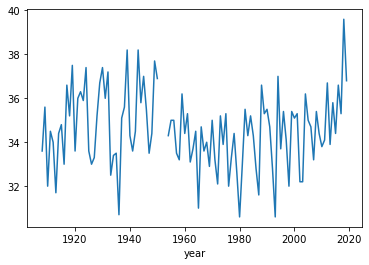

In [44]:
mon8_df = df.loc[df['일시'].dt.month == 8]
mon8_df['year']  =mon8_df['일시'].dt.year
mon8_df.groupby('year')['고온'].max().plot()

In [45]:
# 지구온난화 여부확인을 위해 매년 연평균기온의 line chart를 그리시오..

<AxesSubplot:xlabel='year'>

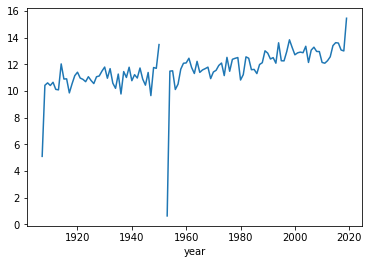

In [50]:
df['year'] = df.일시.dt.year
df.groupby('year')['평온'].mean().plot()

In [51]:
# 1 ~ 12 월 사이 각 월의 일평균기온의 box chart를 그리시오..

weather_list = []

for i in range(1, 13):
    weather_list.append([k for j, k in zip(df['일시'], df['평온']) if j.month == i])
weather_list

[[-5.9,
  -7.7,
  -6.2,
  -7.5,
  -4.8,
  -1.1,
  -4.4,
  -6.3,
  -3.2,
  0.3,
  1.7,
  2.0,
  1.4,
  -3.2,
  -1.9,
  -8.9,
  -6.5,
  1.1,
  1.7,
  -1.1,
  -9.1,
  -9.7,
  -7.1,
  -2.0,
  -1.2,
  -4.1,
  -4.4,
  -6.1,
  -3.5,
  -1.1,
  1.4,
  -7.4,
  -0.9,
  2.4,
  2.4,
  1.2,
  -0.9,
  -3.2,
  -5.5,
  -4.3,
  -3.4,
  -3.8,
  -0.3,
  -3.2,
  -2.9,
  -3.0,
  -3.7,
  0.1,
  2.5,
  -0.4,
  -4.3,
  -6.6,
  -7.2,
  -4.2,
  0.5,
  -1.6,
  -2.3,
  -4.5,
  -2.5,
  -4.8,
  -4.0,
  -2.0,
  -5.2,
  -7.2,
  -1.2,
  3.2,
  2.5,
  3.7,
  3.0,
  1.6,
  -0.3,
  1.2,
  3.1,
  1.4,
  2.4,
  2.9,
  -3.1,
  -7.8,
  -8.5,
  -8.0,
  -4.5,
  1.4,
  1.0,
  -0.3,
  -4.5,
  -5.9,
  -5.4,
  -2.3,
  -0.3,
  -0.2,
  -2.1,
  -15.2,
  -15.4,
  -10.1,
  -12.5,
  -4.3,
  0.8,
  -3.9,
  -9.0,
  -6.8,
  -2.5,
  -4.3,
  -0.8,
  -6.3,
  -15.6,
  -15.3,
  -5.4,
  -6.4,
  -6.0,
  -5.8,
  -5.0,
  -5.7,
  -5.8,
  -3.3,
  -9.2,
  -13.6,
  -10.8,
  -4.0,
  1.2,
  2.5,
  3.7,
  3.0,
  6.0,
  1.4,
  -0.8,
  -9.4,
  -6.8,
  -2.1,


In [52]:
len(weather_list)

12

<AxesSubplot:>

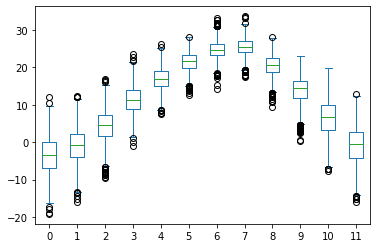

In [55]:
pd.DataFrame(weather_list).T.plot(kind='box')